In [1]:
import warnings                               
warnings.filterwarnings('ignore')

import numpy as np                              
import pandas as pd 

from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

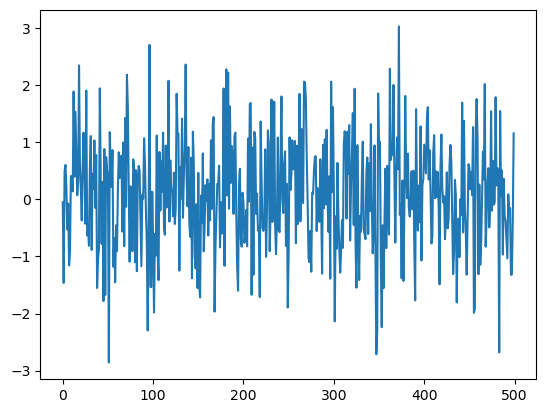

In [2]:
###### time series and ACF of white noise
mean = 0
std = 1 
num_samples = 500
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

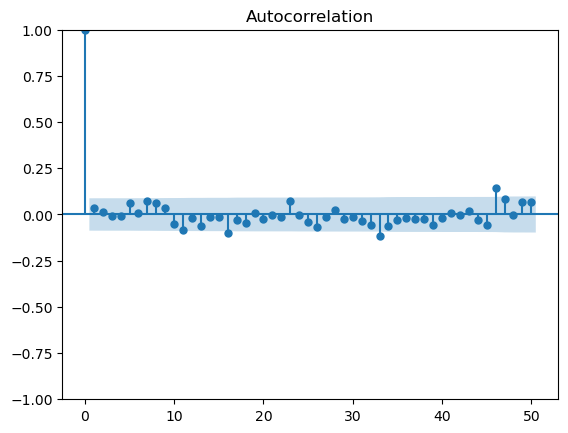

In [3]:
#ACF plot
plot_acf(samples ,lags=50) #change lag to zoom in or out
plt.show()

#understand CI: https://stackoverflow.com/questions/62210345/statsmodels-acf-confidence-interval-doesnt-match-python

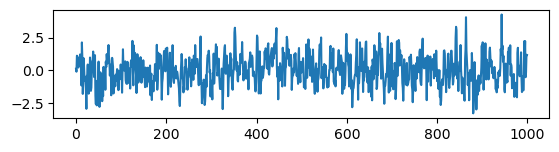

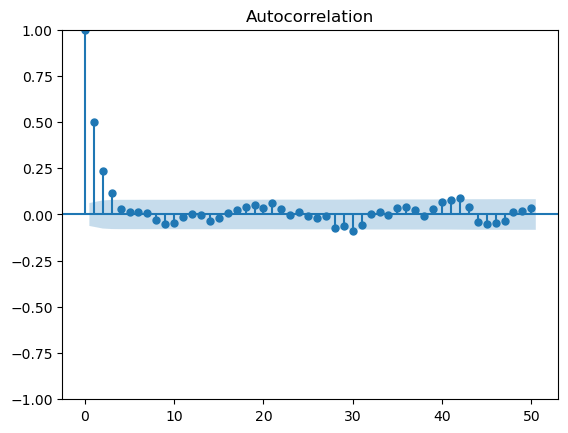

In [7]:

###### time series and ACF of AR Process

### Use ArmaProcess to simulate an AR(1) process 

### https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html

#due to AR(p) uses backward shift operator (later)
#the ar parameter need to be defined as (-\phi)
#add 1 for 0 lag

# AR(1): Yt=0.5Yt-1+Zt, AR parameter = [1, -0.9], MA parameter=[1]
plt.subplot(3,1,1)
ar1 = np.array([1, -0.5])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

#ACF plot
plot_acf(simulated_data_1 ,lags=50) #change lag to zoom in or out
plt.show()

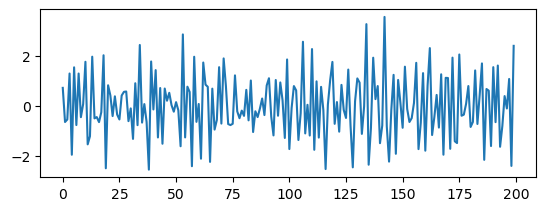

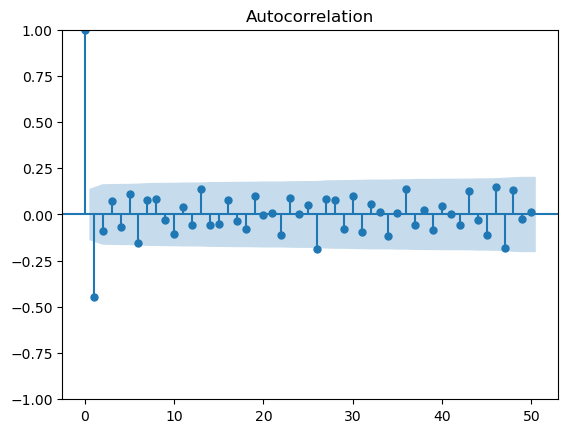

In [8]:
#example: MA(1) process
ar = np.array([1])
ma = np.array([1, -0.8])
MA_object = ArmaProcess(ar, ma)
MA_data =  MA_object.generate_sample(nsample=200)


plt.subplot(2,1,1)
plt.plot(MA_data)
plt.show()


plot_acf(MA_data,lags=50)
plt.show()

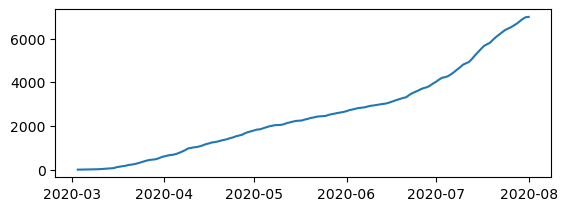

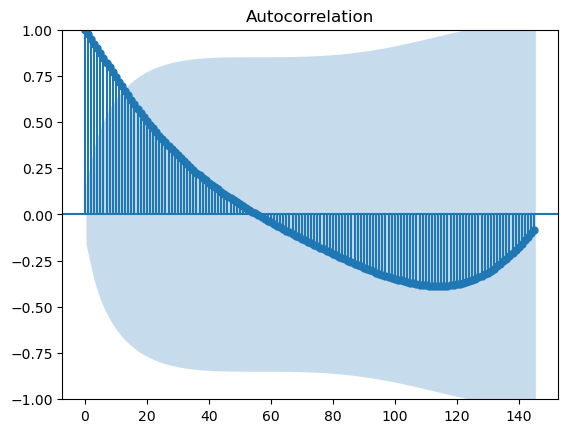

In [9]:
# example: series with trend 
covid_dt = pd.read_csv('covid_sf_confirmed.csv',index_col=['Date'], parse_dates=['Date'])

plt.subplot(2,1,1)
plt.plot(covid_dt.CumCases)
plt.show()


plot_acf(covid_dt.CumCases,lags=145)
plt.show()

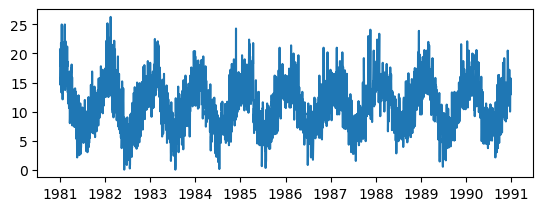

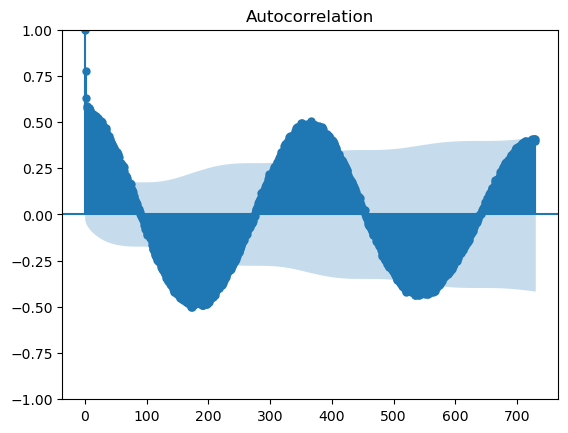

In [10]:
# example: series with seasonality
weather_dt = pd.read_csv('daily-minimum-temperatures.csv', index_col=['Date'], parse_dates=['Date'])
plt.subplot(2,1,1)
plt.plot(weather_dt)
plt.show()
plot_acf(weather_dt,lags=365*2)
plt.show()

In [11]:
#Augmented Dickey-Fuller (ADF) Unit Root test for stationary
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

    #Perform from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


#apply adf test on the series
adf_test(simulated_data_1)

#when p-value<0.05, it's stationary

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.814221e+01
p-value                        2.489037e-30
#Lags Used                     0.000000e+00
Number of Observations Used    9.990000e+02
Critical Value (1%)           -3.436913e+00
Critical Value (5%)           -2.864437e+00
Critical Value (10%)          -2.568313e+00
dtype: float64


<b> Practice </b>
For each of the data below, use time series plot, ACF plot and ADF test to describe if the data is stationary and why:

- simulate an AR(1) process with \alpha= 1.5, n=500
- simulate an MA(1) process with \theta=-0.7, n=500
- `apple-iphone-quarterly-sales.csv`